<a href="https://colab.research.google.com/github/marlonrcfranco/weather-guru/blob/main/weather_guru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# weather-guru
## Will it rain tomorrow?


### Goal 🌦
Implement an algorithm that performs **next day rain prediction** by training machine learning models on the target variable `RainTomorrow`.



### Dataset 📂
The dataset contains about **10 years of daily weather observations** from various locations in **Australia**.

**`RainTomorrow`** is the target variable to be  predicted. It means - it rained the next day, this column is `Yes` if the rain that day was 1mm or more.







## Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

%matplotlib inline

## Defines

In [2]:
DATASET_URL = "https://raw.githubusercontent.com/marlonrcfranco/weather-guru/main/data/weatherAUS.csv"

## Fetch Data

In [3]:
weather_df = pd.read_csv(DATASET_URL,parse_dates=True,index_col=['Date'])
# Dataset is now stored in a Pandas Dataframe

## Visualize Data

### Data Info

In [4]:
weather_df.info()
# 145460 rows, 22 columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm     

### Data Sample

In [5]:
weather_df.sample()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-09,Canberra,NaN,31.5,0.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,29.5,No,No


### Unique values

In [6]:
for col in weather_df:
    print("\n[" + col + "]:")
    print(weather_df[col].unique())


[Location]:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

[MinTemp]:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.

### Histograms

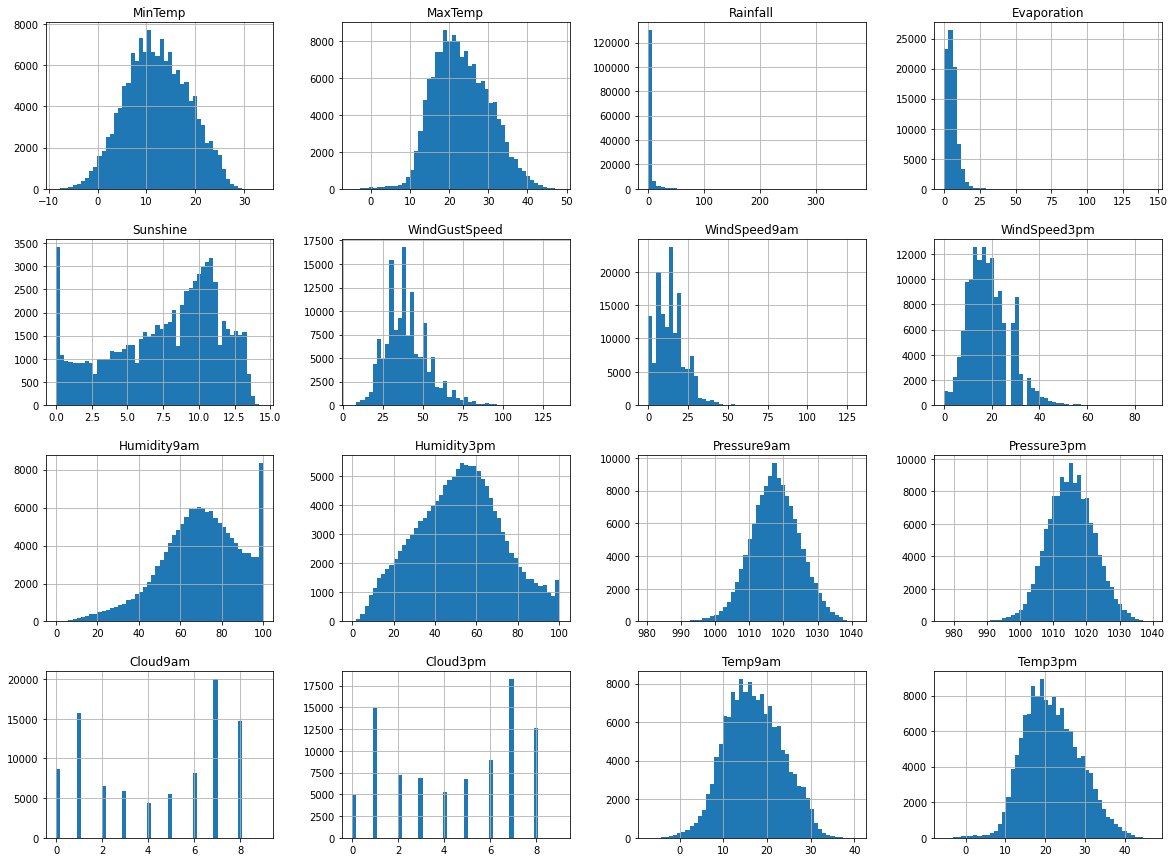

In [7]:
weather_df.hist(bins=50, figsize=(20,15))
plt.show()

### Time Series

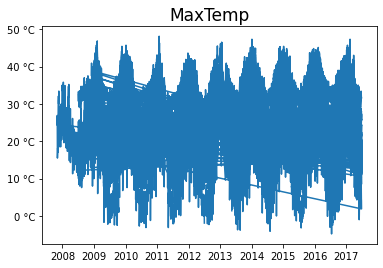

In [8]:
plt.plot(weather_df.index, weather_df.MaxTemp)
plt.title('MaxTemp',fontsize=17)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d °C'))
plt.show()

## Data pre-processing

### Use only rows where the target column is not null

In [9]:
# There are null values (nan) in the RainTomorrow column
print("Before:\n Unique values in the RainTomorrow column: " + str(weather_df.RainTomorrow.unique()))
rows_before = len(weather_df)
print(" Total number of rows: " + str(rows_before))

Before:
 Unique values in the RainTomorrow column: ['No' 'Yes' nan]
 Total number of rows: 145460


In [10]:
# Select only the not-null rows
weather_df = weather_df[weather_df.RainTomorrow.notna()]

print("After:\n Unique values in the RainTomorrow column: " + str(weather_df.RainTomorrow.unique()))
rows_after = len(weather_df)
print(" Total number of rows: " + str(rows_after) + " (" + str(rows_before-rows_after) +  " rows ignored)")

After:
 Unique values in the RainTomorrow column: ['No' 'Yes']
 Total number of rows: 142193 (3267 rows ignored)


### Convert Data Types

In [11]:
# Map 'Yes' and 'No' to True and False to infer boolean values
weather_df.RainToday = weather_df.RainToday.map(dict(Yes=True, No=False))
weather_df.RainTomorrow = weather_df.RainTomorrow.map(dict(Yes=True, No=False))

# Convert data types
weather_df = weather_df.convert_dtypes()

# Visualize new data types
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  string 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  string 
 7   WindGustSpeed  132923 non-null  Int64  
 8   WindDir9am     132180 non-null  string 
 9   WindDir3pm     138415 non-null  string 
 10  WindSpeed9am   140845 non-null  Int64  
 11  WindSpeed3pm   139563 non-null  Int64  
 12  Humidity9am    140419 non-null  Int64  
 13  Humidity3pm    138583 non-null  Int64  
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   Int64  
 17  Cloud3pm     

### Add YEAR, MONTH and DAY columns

In [13]:
weather_df['YEAR'] = weather_df.index.year
weather_df['MONTH'] = weather_df.index.month
weather_df['DAY'] = weather_df.index.day

weather_df.sample()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,YEAR,MONTH,DAY
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-15,Perth,5.1,19.4,0.0,1.6,8.4,E,26,E,E,9,7,73,44,1022.7,1019.2,2,3,12.8,18.6,False,False,2015,6,15


To be Continued...